## Load data

In [ ]:
## Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import math
import scipy.stats as stats
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
seed = 0

In [ ]:
## Load files to the colab
dataset=pd.read_csv("sertaozinhoTIDY.csv", delimiter=",")

In [ ]:
dataset.columns

Index(['id', 'month', 'semester', 'year', 'failed_before_2012', 'pre_k_pub',
       'pre_k_priv', 'kinder_pub', 'kinder_priv', 'act_2012', 'aes_2012',
       'alt_2012', 'anx_2012', 'ass_2012', 'cmp_2012', 'dep_2012', 'ids_2012',
       'ord_2012', 'sfd_2012', 'lang_2012', 'math_2012', 'delay',
       'delay_years', 'ethinicity_branca', 'ethinicity_indigena',
       'ethinicity_parda', 'ethinicity_preta', 'gender_mulher',
       'grade_2012_5.0', 'grade_2012_6.0', 'mother_educ_ef2', 'mother_educ_em',
       'mother_educ_nao_sabe', 'mother_educ_nunca_estudou',
       'mother_educ_superior', 'school_2012_municipal', 'school_2012_privada'],
      dtype='object')

In [ ]:
dataset.describe()

,id,month,semester,year,failed_before_2012,pre_k_pub,pre_k_priv,kinder_pub,kinder_priv,act_2012,aes_2012,alt_2012,anx_2012,ass_2012,cmp_2012,dep_2012,ids_2012,ord_2012,sfd_2012,lang_2012,math_2012,delay,delay_years,ethinicity_branca,ethinicity_indigena,ethinicity_parda,ethinicity_preta,gender_mulher,grade_2012_5.0,grade_2012_6.0,mother_educ_ef2,mother_educ_em,mother_educ_nao_sabe,mother_educ_nunca_estudou,mother_educ_superior,school_2012_municipal,school_2012_privada
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,2652.367055,6.279131,1.466631,2000.749470,0.269068,0.448623,0.036017,0.771716,0.078390,0.027004,-0.040475,-0.036482,0.033438,0.057030,0.042545,0.021433,0.001100,-0.008999,0.027015,0.017508,0.017356,0.133475,0.143008,0.403602,0.011123,0.456568,0.112818,0.519068,0.524894,0.446504,0.226165,0.252119,0.010064,0.154661,0.064619,0.639831,0.100106
std,1528.163148,3.414789,0.499017,0.905293,0.443593,0.497485,0.186382,0.419838,0.268855,0.972697,0.993413,0.962960,0.988440,0.973832,1.007410,0.979368,0.976056,0.962067,0.984932,0.981209,0.992427,0.340177,0.500867,0.490749,0.104905,0.498242,0.316454,0.499769,0.499512,0.497262,0.418458,0.434344,0.099838,0.361677,0.245917,0.480177,0.300221
min,5.000000,1.000000,1.000000,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.333034,-3.454074,-2.940817,-3.762595,-3.047933,-2.678637,-2.365950,-3.934303,-2.407924,-3.058979,-3.594707,-3.035328,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1368.500000,3.000000,1.000000,2000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.657450,-0.681952,-0.715586,-0.382502,-0.546322,-0.655119,-0.699856,-0.605261,-0.719280,-0.589534,-0.406369,-0.597954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2687.500000,6.000000,1.000000,2001.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.076178,-0.080858,-0.075450,0.040009,0.015435,0.034762,-0.134814,0.000954,-0.156399,0.016178,0.161777,0.081594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3959.000000,9.000000,2.000000,2001.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.766651,0.617711,0.556111,0.885032,0.699616,0.756731,0.577631,0.627718,0.576519,0.663631,0.718352,0.722798,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5305.000000,12.000000,2.000000,2003.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.553970,3.233283,3.760280,3.234790,3.357291,2.864741,5.392776,3.203273,4.159023,3.126766,1.725766,2.012405,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## General summary 

## Percentage of total missing values and what percentage of people that were in 4th grade in 2012 didn't take language and Math tests.

Note that the number of people that didn't take the Math test was equal to the number of people that didn't take the Language test.So the percentage above is assuming that those who didn't take one test necessarily didn't take the other.



In [ ]:
def percentage_of_missing_values(dataset):
    #creates a list with all column names within the dataset
    list_columns = dataset.columns
    missing = 0
    #iterates over each column,adding up the number of missing values in each column on the variable "missing"
    for column in list_columns:
        missing += dataset[column].isna().sum()
    #divides the quantity of total missing values with the total number of values.
    #Then the number is transformed into a percentage.
    return round((missing*100)/(dataset.shape[0]*dataset.shape[1]),2)

In [ ]:
print("The percentage of missing values is",percentage_of_missing_values(dataset),"%")

The percentage of missing values is 0.0 %


In [ ]:
dataset = dataset.dropna()



##Variáveis com correlação mais representativas



* the "grad_2017" and "grade_2012", as expected is highly correlated
* the language and math grades, also was highly correlated
* grades and delay_years also are highly correlated
* math and language are correlated

## Heatmaps

In [ ]:
dataset.corrwith(dataset.delay).sort_values()

lang_2012                   -0.197107
math_2012                   -0.177099
gender_mulher               -0.074203
year                        -0.068603
act_2012                    -0.063644
mother_educ_em              -0.055715
mother_educ_superior        -0.046142
kinder_pub                  -0.042569
semester                    -0.042429
grade_2012_5.0              -0.041396
ethinicity_branca           -0.037165
month                       -0.036196
anx_2012                    -0.036090
ethinicity_preta            -0.016886
pre_k_priv                  -0.008996
mother_educ_nao_sabe        -0.008364
ids_2012                    -0.005256
cmp_2012                    -0.002523
kinder_priv                  0.001424
mother_educ_nunca_estudou    0.004417
sfd_2012                     0.007164
id                           0.019578
school_2012_privada          0.019580
pre_k_pub                    0.024886
school_2012_municipal        0.025185
grade_2012_6.0               0.026569
ethinicity_p

In [ ]:
## Personality traits and score in tests
columns_list = ['act_2012', 'aes_2012', 'alt_2012', 'anx_2012', 'ass_2012', 'cmp_2012', 'dep_2012', 'ids_2012',
       'ord_2012', 'sfd_2012', 'lang_2012', 'math_2012']

In [ ]:
dataset = dataset.rename(columns={'act_2012' : "activity", 'aes_2012' : "aesthetics", 'alt_2012' : "altruism", 'anx_2012' : "anxiety", 'ass_2012' : "assertiveness", 'cmp_2012' : "compliance", 'dep_2012' : "depression", 'ids_2012' : "ideas",
       'ord_2012' : "order", 'sfd_2012' : "self-discipline", 'lang_2012' : "languages", 'math_2012' : "mathematics"})

In [ ]:
columns_list = ['activity', 'aesthetics', 'altruism', 'anxiety', 'assertiveness', 'compliance', 'depression', 'ideas', 'order', 'self-discipline', 'languages', 'mathematics']

Heatmap of notes with the target

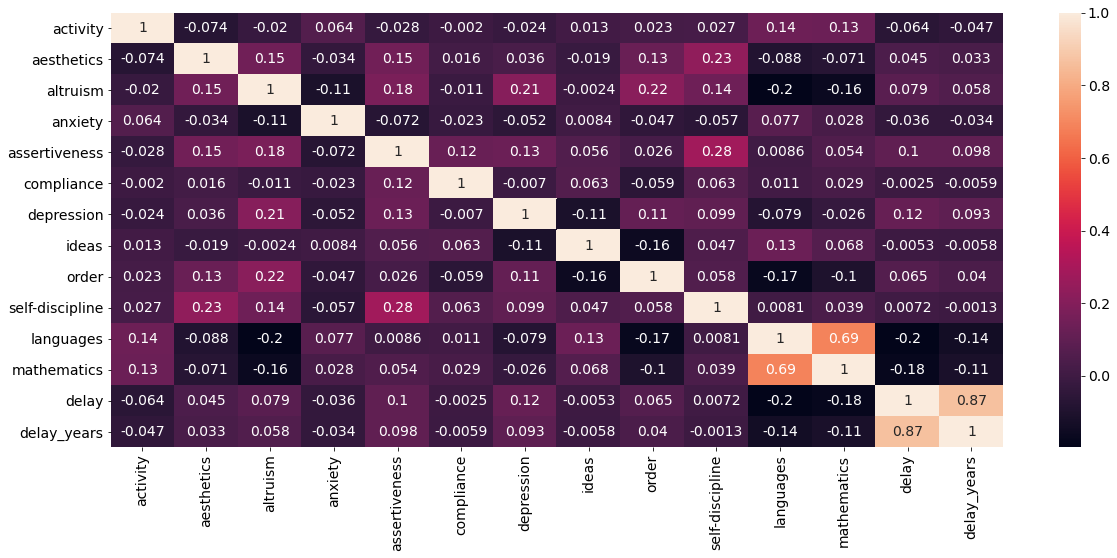

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(pd.concat([dataset[columns_list], dataset['delay'], dataset['delay_years']], axis=1).corr(), annot=True)
plt.show()

Heatmap with clusterization


<Figure size 1440x576 with 0 Axes>

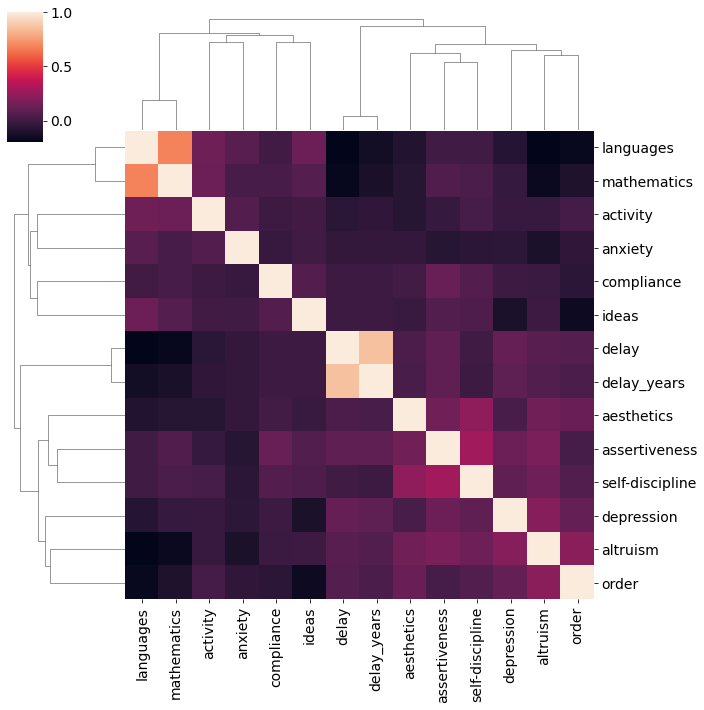

In [ ]:
plt.figure(figsize=(20,8))
sns.clustermap(pd.concat([dataset[columns_list], dataset['delay'], dataset['delay_years']], axis=1).corr())
plt.show()

## Boxplot

In [ ]:
datamelted = pd.melt(dataset, id_vars=["id", "delay"], value_vars= columns_list)

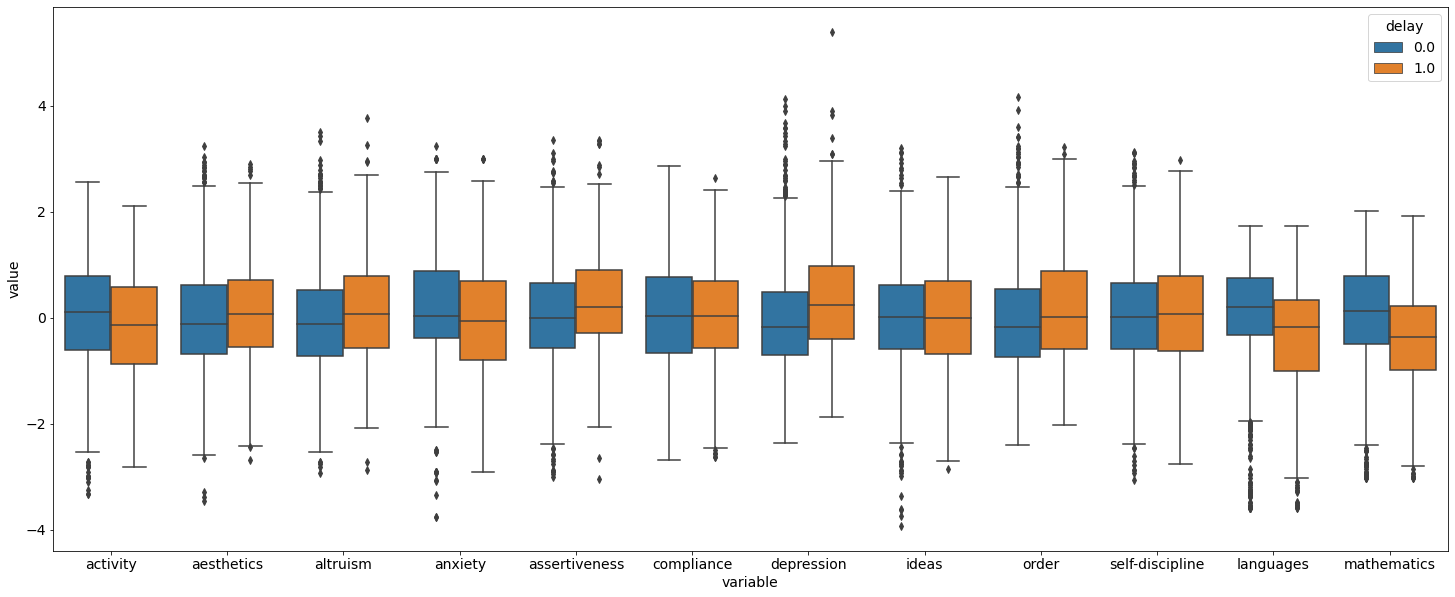

In [ ]:
dimentions = (25,10)
fig, ax = plt.subplots(figsize = dimentions)

sns.boxplot(data = datamelted, x = "variable", y = "value", hue = "delay", ax = ax,
            palette = "tab10")

## Dimensional reduction

### Pre-processing

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
dataset_personalyties = dataset[columns_list]
delay = dataset.delay
delay_years = dataset.delay_years

In [ ]:
from sklearn.impute import SimpleImputer
dataset_personalyties_tidy = pd.DataFrame(SimpleImputer().fit_transform(dataset_personalyties))
dataset_personalyties_tidy.columns = dataset_personalyties.columns

In [ ]:
dataset_tidy = pd.DataFrame(SimpleImputer().fit_transform(dataset))
dataset_tidy.columns = dataset.columns

In [ ]:
dataset_tidy = dataset_tidy.drop(["id","delay", "delay_years"], axis=1)

### MDS plot

In [ ]:
mds = MDS(2, random_state=seed)
X_2d = mds.fit_transform(dataset_personalyties_tidy)

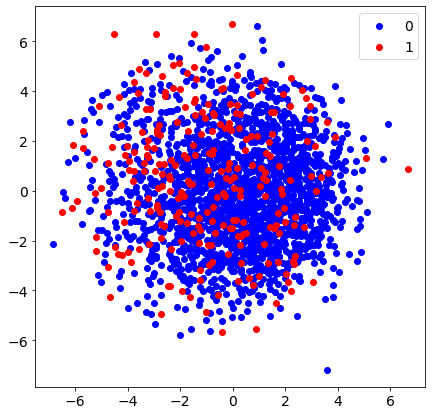

In [ ]:
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
colors = ['blue', 'red']

for i in np.unique(delay):
    subset = X_2d[delay == i]
    x = [row[0] for row in subset]
    y = [row[1] for row in subset]
    plt.scatter(x,y,c=colors[int(i)],label=int(i))
plt.legend()
plt.show()

In [ ]:
mds = MDS(2, random_state=seed)
X_2d = mds.fit_transform(dataset_tidy)

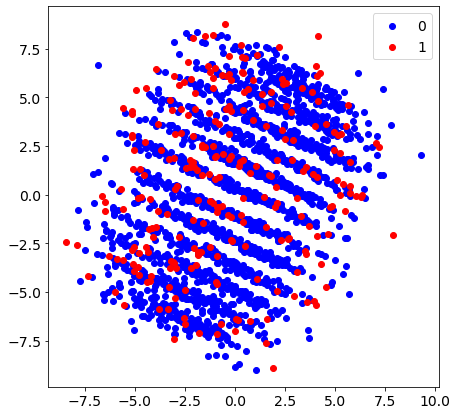

In [ ]:
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
colors = ['blue', 'red']

for i in np.unique(delay):
    subset = X_2d[delay == i]
    x = [row[0] for row in subset]
    y = [row[1] for row in subset]
    plt.scatter(x,y,c=colors[int(i)],label=int(i))
plt.legend()
plt.show()

### Linear discrimination analysis

In [ ]:
dataset_personalyties_tidy

,activity,aesthetics,altruism,anxiety,assertiveness,compliance,depression,ideas,order,self-discipline,languages,mathematics
0,-2.987797,0.942627,-1.233790,1.307544,-0.288370,-0.735338,-0.699856,-0.481963,-0.906907,-1.754367,-0.640179,-0.385608
1,0.162487,-1.120588,1.753507,-1.650037,1.952192,0.901125,0.626765,2.175791,-0.226759,2.008042,-1.349541,-0.907730
2,0.110889,-2.437910,-1.331202,1.307544,-1.672004,-0.483521,0.685512,-0.296867,-1.343344,-0.050673,-0.200809,0.644074
3,0.076178,0.471499,0.168411,-0.382502,-0.870663,0.532119,-1.731673,2.093592,-0.132946,-1.218544,-0.344307,0.087107
4,0.033023,-0.763181,-0.624138,1.307544,0.407850,-0.655119,-0.454186,0.340023,-0.086039,0.225848,0.685803,0.855149
...,...,...,...,...,...,...,...,...,...,...,...,...
1883,0.939269,-0.015875,0.397030,-0.805014,0.458484,-1.393131,0.970704,1.545602,1.274257,0.470463,0.713697,0.807399
1884,0.097755,-0.535740,-0.959447,0.462521,-0.718761,-0.478638,-0.527887,-0.454563,-0.156399,0.097717,0.930919,0.887851
1885,-0.451997,-0.742697,-0.966736,-1.227525,-0.777650,-0.221938,0.712216,-0.978133,-0.731517,-0.341881,0.706259,0.245822
1886,0.939269,-0.828164,-1.508134,1.307544,0.774948,0.211244,-0.257649,0.518120,-0.484746,-1.859202,-0.281005,0.671637


In [ ]:
dataset_personalyties_tidy.shape

(1888, 12)

In [ ]:
lda.fit(dataset_personalyties_tidy, delay_years)
predict = lda.transform(dataset_personalyties_tidy)

In [ ]:
np.unique(dataset.delay_years)

array([-2., -1.,  0.,  1.,  2.,  3.,  4.])

In [ ]:
predict.shape

(1888, 2)

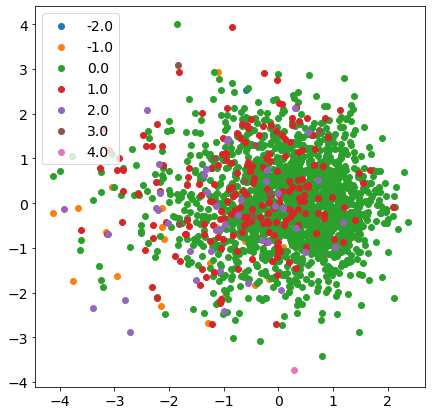

In [ ]:
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)


for i in np.unique(delay_years):
    subset = predict[delay_years == i]
    x = [row[0] for row in subset]
    y = [row[1] for row in subset]
    plt.scatter(x,y,label=i)
plt.legend()
plt.show()

In [ ]:
lda2 = LinearDiscriminantAnalysis(n_components=1)
predict = lda2.fit_transform(dataset_personalyties_tidy, delay)


In [ ]:
predict.shape

(1888, 1)

In [ ]:
sub0 = predict[delay == 0]
sub1 = predict[delay == 1]

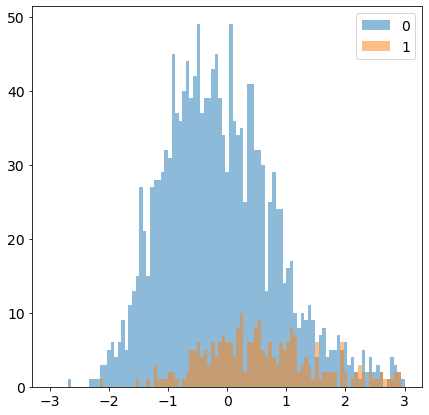

In [ ]:
bins = np.linspace(-3, 3, 100)
plt.hist(sub0, bins, alpha=0.5, label='0')
plt.hist(sub1, bins, alpha=0.5, label='1')
plt.legend(loc='upper right')
plt.show()


### Supervisoned Variational Relevance Learning (SUVREL)

In [ ]:
!git clone https://github.com/jonataseduardo/suvrel.git

fatal: destination path 'suvrel' already exists and is not an empty directory.


In [ ]:
from suvrel.suvrel import SUVREL

In [ ]:
sv = SUVREL()
predict = sv.fit_transform(dataset_personalyties_tidy, delay)

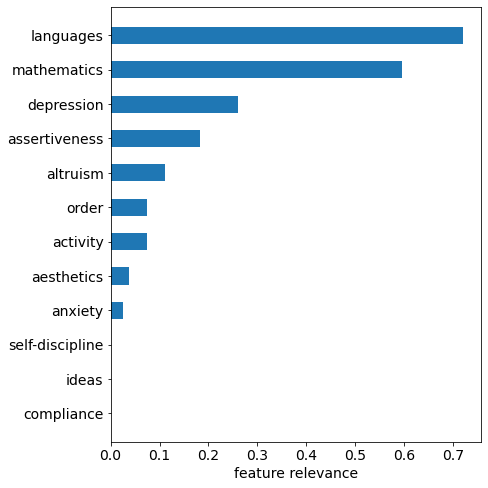

In [ ]:
sv.plot_relevance(feature_names=dataset_personalyties.columns)

In [ ]:
sv.distance_matrix(dataset_personalyties_tidy).shape

(1888, 1888)

In [ ]:
mds = MDS(2, random_state=seed)
X_2d = mds.fit_transform(predict)

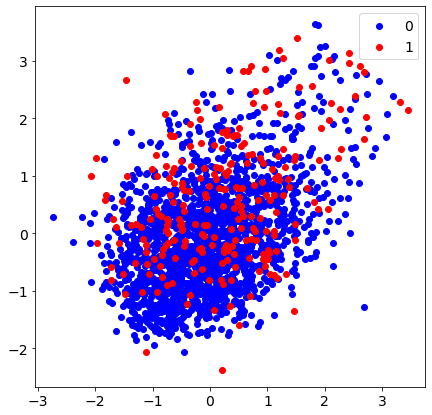

In [ ]:
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
colors = ['blue', 'red']

for i in np.unique(delay):
    subset = X_2d[delay == i]
    x = [row[0] for row in subset]
    y = [row[1] for row in subset]
    plt.scatter(x,y,c=colors[int(i)],label=int(i))
plt.legend()
plt.show()

### Supervisoned Variational Relevance Learning (SUVREL) All data

In [ ]:
!git clone https://github.com/jonataseduardo/suvrel.git

fatal: destination path 'suvrel' already exists and is not an empty directory.


In [ ]:
from suvrel.suvrel import SUVREL

In [ ]:
sv = SUVREL()
predict = sv.fit_transform(dataset_tidy, delay)

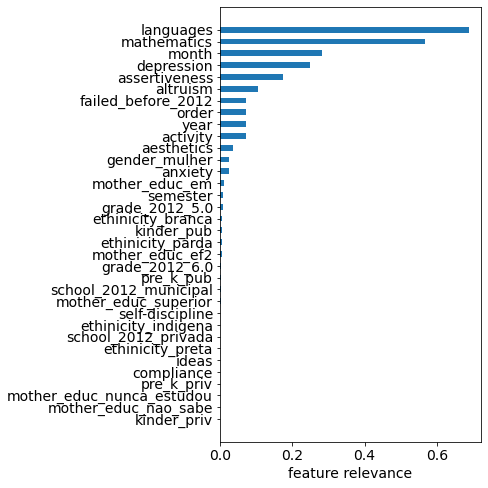

In [ ]:
sv.plot_relevance(feature_names=dataset_tidy.columns)

In [ ]:
sv.distance_matrix(dataset_tidy).shape

(1888, 1888)

In [ ]:
mds = MDS(2, random_state=seed)
X_2d = mds.fit_transform(predict)

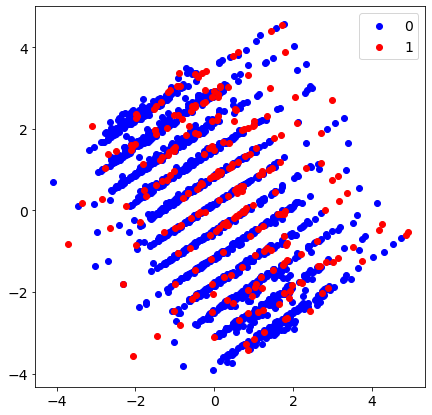

In [ ]:
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
colors = ['blue', 'red']

for i in np.unique(delay):
    subset = X_2d[delay == i]
    x = [row[0] for row in subset]
    y = [row[1] for row in subset]
    plt.scatter(x,y,c=colors[int(i)],label=int(i))
plt.legend()
plt.show()

### UMAP plot

In [ ]:
!pip install umap-learn[plot]

In [ ]:
from umap import UMAP
import umap.plot as umapplot


In [ ]:
?UMAP()

In [ ]:
umap = UMAP(n_neighbors= 200, min_dist = 0.01)
mapper = umap.fit(dataset_personalyties_tidy)


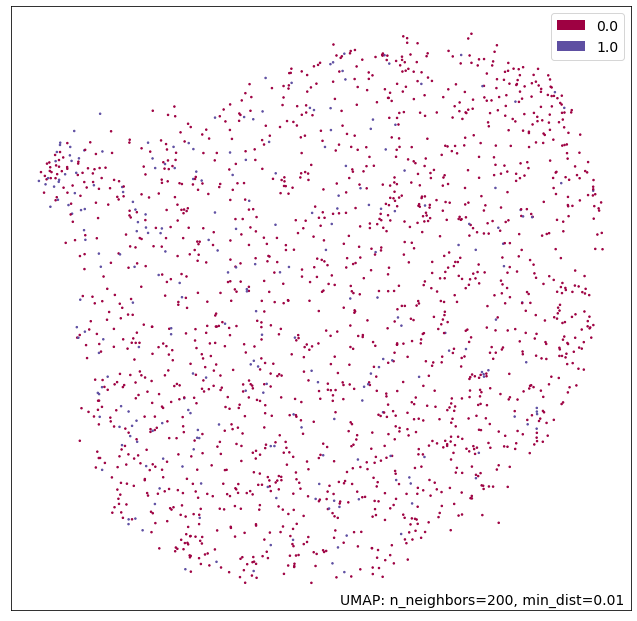

In [ ]:
umapplot.points(mapper, labels = delay)

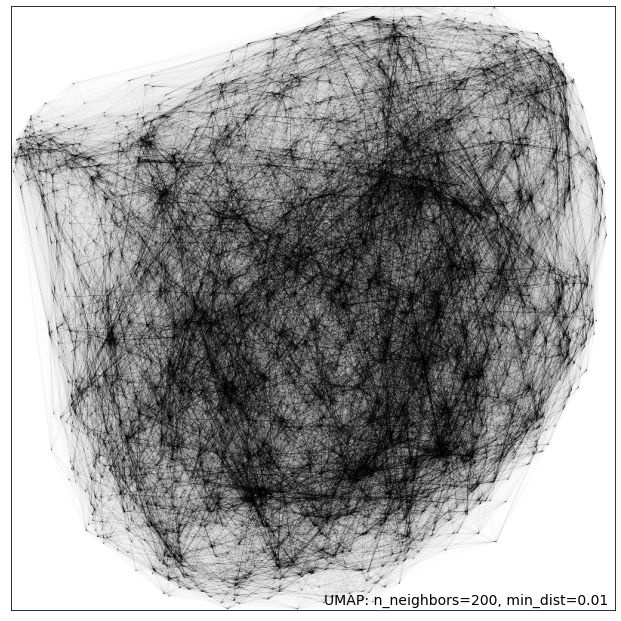

In [ ]:
umapplot.connectivity(mapper, labels = delay)

In [ ]:
## Análise de discriminante linear